In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import folium





In [27]:
#On importe les données 
df1_clean=pd.read_csv("ANNONCES_CLEAN.CSV.csv")
df1_clean

,city,postcode,titles,price_eur,area_m2,land_m2,rooms
0,Brest,29200,Avendrebrestkerichensaintlucappartementt4doubl...,160125,73.0,0.0,4
1,Brest,29200,Maisonfamiliale4chambressursoussolcomplet-bres...,335000,127.0,477.0,6
2,Brest,29200,Appartementenduplexavendreterrassevuemerascens...,655000,103.0,0.0,5
3,Brest,29200,Maison95m²àbrest,238970,95.0,350.0,5
4,Brest,29200,Appartement41m²àbrest,165900,41.0,0.0,2
...,...,...,...,...,...,...,...
235,Nice,6300,"Maisont4avecterrasse,jardinetdépendance",495000,108.0,40.0,4
236,Nice,6000,Parking10m²ànice,45000,10.0,0.0,0
237,Nice,6000,Appartement10m²ànice,90000,11.0,0.0,1
238,Nice,6000,Appartement68m²ànice,345000,69.0,0.0,3


In [28]:
len(df1_clean)

240

In [29]:
#Creation d'une nouvelle variable qui donne le prix au m2
df1_clean['price_m2'] = df1_clean['price_eur'] / df1_clean['area_m2']

Ici, nous commençons le nettoyage des données

In [30]:
#verification 
df1_clean['price_m2'].describe()

count      240.000000
mean      3993.609301
std       2533.581703
min        127.667683
25%       2296.551724
50%       3154.929577
75%       5159.244265
max      13717.647059
Name: price_m2, dtype: float64

Calcule du prix moyen par ville.

Nice a le plus moyen par ville le plus élévé.

In [31]:

df1_clean.groupby('city')['price_m2'].mean()



city
Brest               2948.074365
Clermont-Ferrand    2823.475622
Nice                6209.277917
Name: price_m2, dtype: float64

Nous remarquons que l’histogramme montre la distribution des prix au mètre carré pour l’ensemble des annonces (Brest, Clermont-Ferrand, Nice)
On observe une forte concentration des prix au m² entre :
2 000 € et 4 500 € / m² et il on remarque qu'il y'a des sous groupes dans les données.

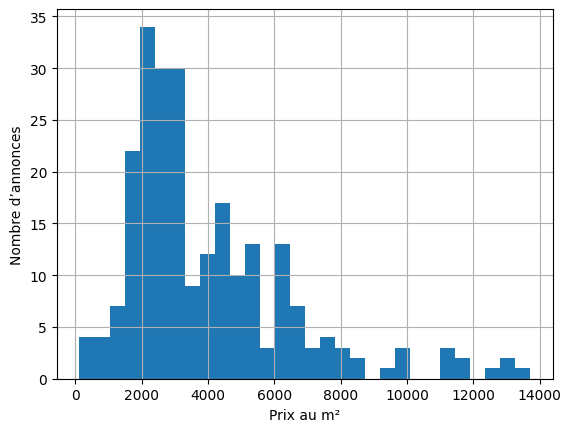

In [32]:
df1_clean['price_m2'].hist(bins=30)
plt.xlabel("Prix au m²")
plt.ylabel("Nombre d’annonces")
plt.show()




Distribution par ville. 

Ville de BREST

<Axes: >

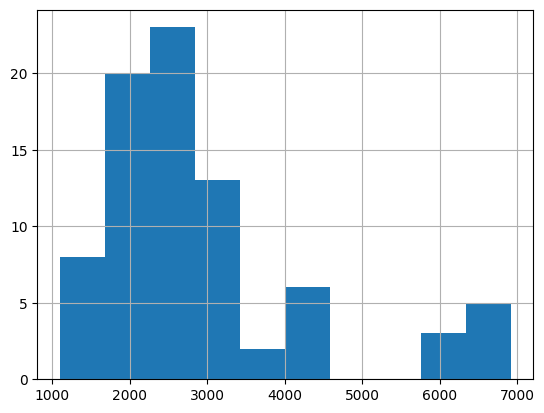

In [33]:

df1_clean[df1_clean['city']=="Brest"]['price_m2'].hist()


Distribution par ville. 

Ville de NICE

<Axes: >

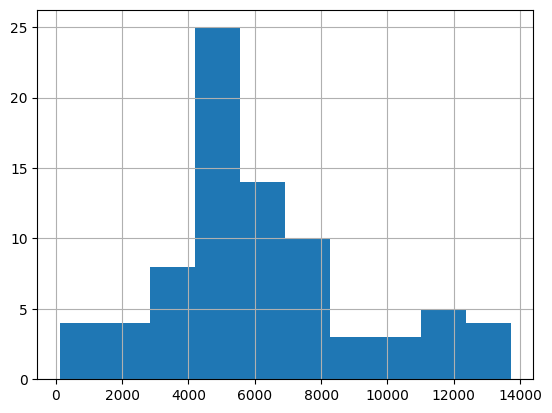

In [34]:

df1_clean[df1_clean['city']=="Nice"]['price_m2'].hist()


Distribution par ville. 

Ville de Clermont-Ferrand

<Axes: >

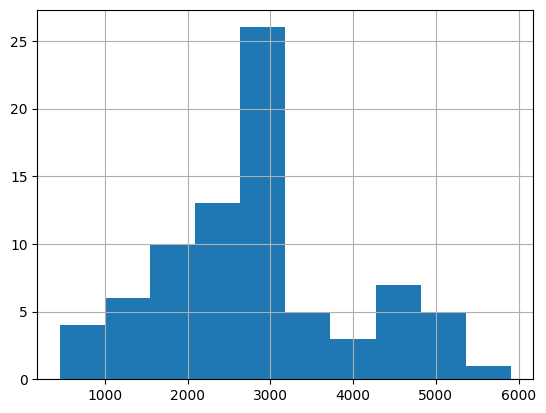

In [35]:
##distribution des prix à Clermont-Ferrand
df1_clean[df1_clean['city']=="Clermont-Ferrand"]['price_m2'].hist()


Nuage de point 

<Axes: xlabel='area_m2', ylabel='price_m2'>

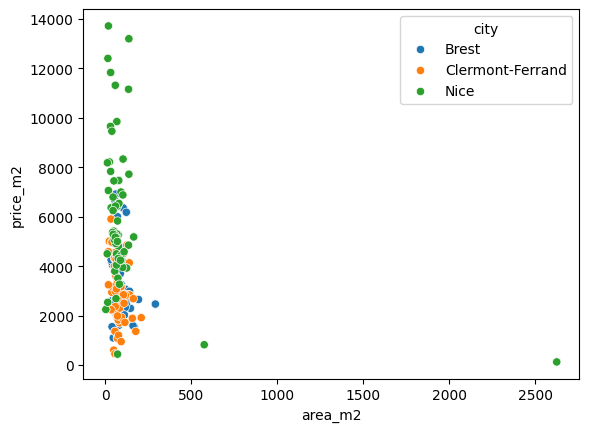

In [36]:
sns.scatterplot(data=df1_clean, x='area_m2', y='price_m2', hue='city')

Boite à Moustâche.

On peut remarquer que la ville de Nice est celle qui a les prix de logements le plus élévé

<Axes: xlabel='city', ylabel='price_m2'>

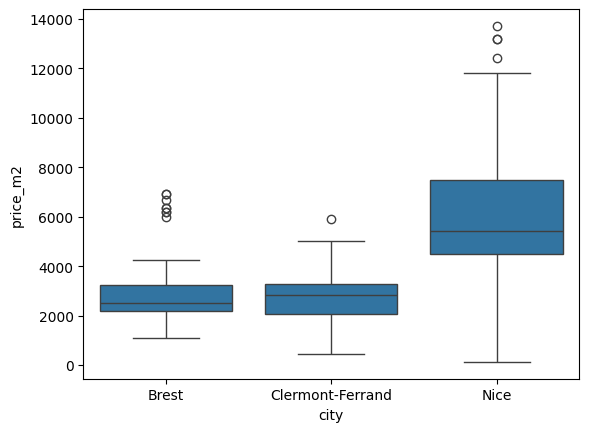

In [38]:
sns.boxplot(data=df1_clean, x='city', y='price_m2')

Matrice de correlation afin de comprendre les liens entre variables
✔ détecter les relations fortes ou faibles
✔ repérer la multicolinéarité entre variables



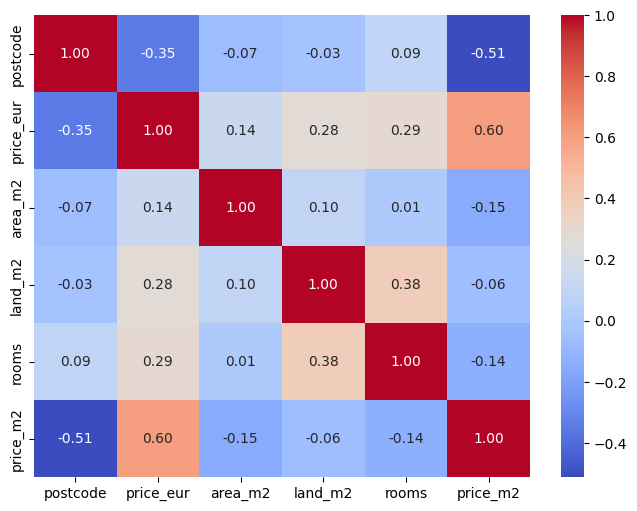

In [40]:
corr_matrix = df1_clean.select_dtypes(include=['float64','int64']).corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


On remarque une Correlation positive entre la surface et le prix

NameError: name 'model' is not defined

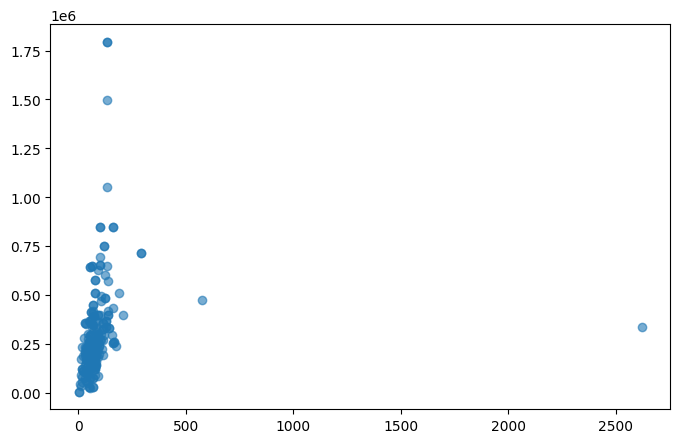

In [43]:


# Scatter
plt.figure(figsize=(8,5))
plt.scatter(df1_clean['area_m2'], df1_clean['price_eur'], alpha=0.6)

# Droite de régression
a, b = model.params  # intercept et pente
x_vals = np.linspace(df1_clean['area_m2'].min(), df1_clean['area_m2'].max(), 100)
y_vals = a + b * x_vals

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.title("Régression linéaire : Prix en fonction de la surface")
plt.show()


In [148]:
coords_villes = {
    "Brest": (48.3904, -4.4861),
    "Nice": (43.7102, 7.2620),
    "Clermont-Ferrand": (45.7772, 3.0870)
}



In [150]:

df1_clean['lat'] = df1_clean['city'].map(lambda c: coords_villes[c][0])
df1_clean['lon'] = df1_clean['city'].map(lambda c: coords_villes[c][1])


# Centre de la carte = moyenne des lat/lon
center_lat = df1_clean['lat'].mean()
center_lon = df1_clean['lon'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Boucle sur les biens immobiliers
for _, row in df1_clean.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        tooltip=f"{row['city']} - {row['price_eur']:.0f} €",  # affiché au survol
        popup=f"""
        <b>Ville :</b> {row['city']}<br>
        <b>Prix :</b> {row['price_eur']:.0f} €<br>
        <b>Surface :</b> {row['area_m2']} m²
        """
    ).add_to(m)

m  # IMPORTANT : le mettre en dernière ligne de la cellule
m.save("carte_immo.html")



Carte Visualisation cartographique 
 Création d'une carte interactive avec folium, où chaque bien est un point avec 
prix affiché au survol. 

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# On part de df1_clean avec au moins : city, postcode, price_eur
# Exemple de colonnes : ['city', 'postcode', 'price_eur', 'area_m2', 'land_m2', 'rooms', 'price_m2', 'title']

# 1. Construire une adresse textuelle
df1_clean['full_address'] = (
    df1_clean['postcode'].astype(str) + " " + df1_clean['city'] + ", France"
)

# 2. Initialiser le géocodeur
geolocator = Nominatim(user_agent="immo_analysis")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 3. Géocodage (⚠️ ça peut prendre du temps si tu as beaucoup de lignes)
def get_coords(addr):
    try:
        loc = geocode(addr)
        if loc:
            return pd.Series({'lat': loc.latitude, 'lon': loc.longitude})
    except:
        pass
    return pd.Series({'lat': None, 'lon': None})

df1_clean[['lat', 'lon']] = df1_clean['full_address'].apply(get_coords)

# Optionnel : filtrer les lignes où la géolocalisation n'a pas marché
df_geo = df1_clean.dropna(subset=['lat', 'lon'])


# Point central de la France (ou tu peux centrer sur Clermont)
m = folium.Map(location=[46.5, 2.5], zoom_start=5)

for _, row in df1_clean.dropna(subset=['lat', 'lon']).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"{row['city']}<br>{row['price_eur']:.0f} €",   # clic
        tooltip=f"{row['price_eur']:.0f} €"                   # survol
    ).add_to(m)

m  # très important : c’est cette ligne qui affiche la carte dans le notebook

villes_focus = ['Brest', 'Nice', 'Clermont-Ferrand']
df_sub = df1_clean[df1_clean['city'].isin(villes_focus)].dropna(subset=['lat', 'lon'])

m = folium.Map(location=[46.5, 2.5], zoom_start=5)

for _, row in df_sub.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"{row['city']}<br>{row['price_eur']:.0f} €",
        tooltip=f"{row['price_eur']:.0f} €"
    ).add_to(m)

m
m.save("carte_villes1.html")


RateLimiter caught an error, retrying (0/2 tries). Called with (*('6200 Nice, France',), **{}).
Traceback (most recent call last):
  File "C:\Users\ebene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\urllib3\connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
  File "C:\Users\ebene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\urllib3\connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1430, in getresponse
    response.begin()
    ~~~~~~~~~~~~~~^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 331, in begin
    version, status, reason = self._read_status()
   

In [152]:
df1_clean

,city,postcode,titles,price_eur,area_m2,land_m2,rooms,price_m2,lat,lon
0,Brest,29200,Avendrebrestkerichensaintlucappartementt4doubl...,160125,73.0,0.0,4,2193.493151,48.3904,-4.4861
1,Brest,29200,Maisonfamiliale4chambressursoussolcomplet-bres...,335000,127.0,477.0,6,2637.795276,48.3904,-4.4861
2,Brest,29200,Appartementenduplexavendreterrassevuemerascens...,655000,103.0,0.0,5,6359.223301,48.3904,-4.4861
3,Brest,29200,Maison95m²àbrest,238970,95.0,350.0,5,2515.473684,48.3904,-4.4861
4,Brest,29200,Appartement41m²àbrest,165900,41.0,0.0,2,4046.341463,48.3904,-4.4861
...,...,...,...,...,...,...,...,...,...,...
232,Nice,6300,Appartementt4de102m²,695000,101.0,0.0,4,6881.188119,43.7102,7.2620
233,Nice,6200,Beaustudiovuemerànicede25m²+garagefermé,173665,14.0,0.0,1,12404.642857,43.7102,7.2620
235,Nice,6300,"Maisont4avecterrasse,jardinetdépendance",495000,108.0,40.0,4,4583.333333,43.7102,7.2620
237,Nice,6000,Appartement10m²ànice,90000,11.0,0.0,1,8181.818182,43.7102,7.2620
